In [17]:
# Install libraris, if not yet.
! pip install firebase_admin pandas

In [32]:
import serial
import firebase_admin
from firebase_admin import credentials, db
import time

# Initialize Firebase only if not already initialized
if not firebase_admin._apps:
    databaseURL = 'https://activity5-eefd3-default-rtdb.asia-southeast1.firebasedatabase.app/'
    cred_obj = firebase_admin.credentials.Certificate(
        'activity5-eefd3-firebase-adminsdk-gyyg3-a8c4142a64.json'
    )
    default_app = firebase_admin.initialize_app(cred_obj, {
        'databaseURL': databaseURL
    })

# Connect to Arduino via serial port
ser = serial.Serial('COM5', 115200)  

# Reference to Firebase database
ref = db.reference('/GyroscopeData')

# Read and upload data
while True:
    data = ser.readline().decode('utf-8').strip()
    print(f"Raw data received: {data}")  # Print the raw data to understand its structure
    
    # Ensure the data has the correct number of components
    if data.count(':') == 3 and data.count(',') == 2:
        try:
            # Split and clean the values
            values = data.split(', ')
            gyroX = float(values[0].split(':')[1].strip())
            gyroY = float(values[1].split(':')[1].strip())
            gyroZ = float(values[2].split(':')[1].strip())
            
            # Create a dictionary to upload to Firebase
            gyro_data = {
                'gyroX': gyroX,
                'gyroY': gyroY,
                'gyroZ': gyroZ,
                'timestamp': time.time()  # Add timestamp
            }

            # Upload to Firebase
            ref.push(gyro_data)
            print(f"Uploaded: {gyro_data}")
        except (IndexError, ValueError) as e:
            print(f"Error processing data: {e}")
    else:
        print("Skipping malformed data.")

    time.sleep(0.2)  # To match the Arduino sampling rate (~50Hz)


Raw data received: X: 0.55, Y: -0.06, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.06, 'gyroZ': -0.43, 'timestamp': 1723896805.1813629}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896805.8243372}
Raw data received: X: 0.55, Y: -0.12, Z: -0.37
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.37, 'timestamp': 1723896806.178285}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896806.5173125}
Raw data received: X: 0.49, Y: -0.06, Z: -0.43
Uploaded: {'gyroX': 0.49, 'gyroY': -0.06, 'gyroZ': -0.43, 'timestamp': 1723896806.8553548}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896807.193726}
Raw data received: X: 0.49, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.49, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896807.5476265}
Raw data received: X: 0.61, Y: -0.06

Raw data received: X: 0.55, Y: -0.06, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.06, 'gyroZ': -0.43, 'timestamp': 1723896826.7039657}
Raw data received: X: 0.49, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.49, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896827.0436714}
Raw data received: X: 0.61, Y: -0.06, Z: -0.43
Uploaded: {'gyroX': 0.61, 'gyroY': -0.06, 'gyroZ': -0.43, 'timestamp': 1723896827.3847291}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896827.725069}
Raw data received: X: 0.55, Y: -0.06, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.06, 'gyroZ': -0.43, 'timestamp': 1723896828.0690048}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896828.3963027}
Raw data received: X: 0.55, Y: -0.12, Z: -0.43
Uploaded: {'gyroX': 0.55, 'gyroY': -0.12, 'gyroZ': -0.43, 'timestamp': 1723896828.7245963}
Raw data received: X: 0.55, Y: -0.0

KeyboardInterrupt: 

Raw data received: X: 0.67, Y: -0.06, Z: X: 0.67, Y: -0.06, Z: -0.37


In [33]:
import csv

# Reference to the gyroscope data
ref = db.reference('/GyroscopeData')

# Fetch all data from Firebase
data = ref.get()

# Save to CSV
with open('gyroscope_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['timestamp', 'gyroX', 'gyroY', 'gyroZ'])

    for key, value in data.items():
        writer.writerow([value['timestamp'], value['gyroX'], value['gyroY'], value['gyroZ']])

print("Data saved to gyroscope_data.csv")


Data saved to gyroscope_data.csv


In [35]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('gyroscope_data.csv')

# Drop any rows with missing or non-numeric values
df = df.dropna()

# Save cleaned data
df.to_csv('cleaned_gyroscope_data.csv', index=False)

print("Cleaned data saved to cleaned_gyroscope_data.csv")


Cleaned data saved to cleaned_gyroscope_data.csv


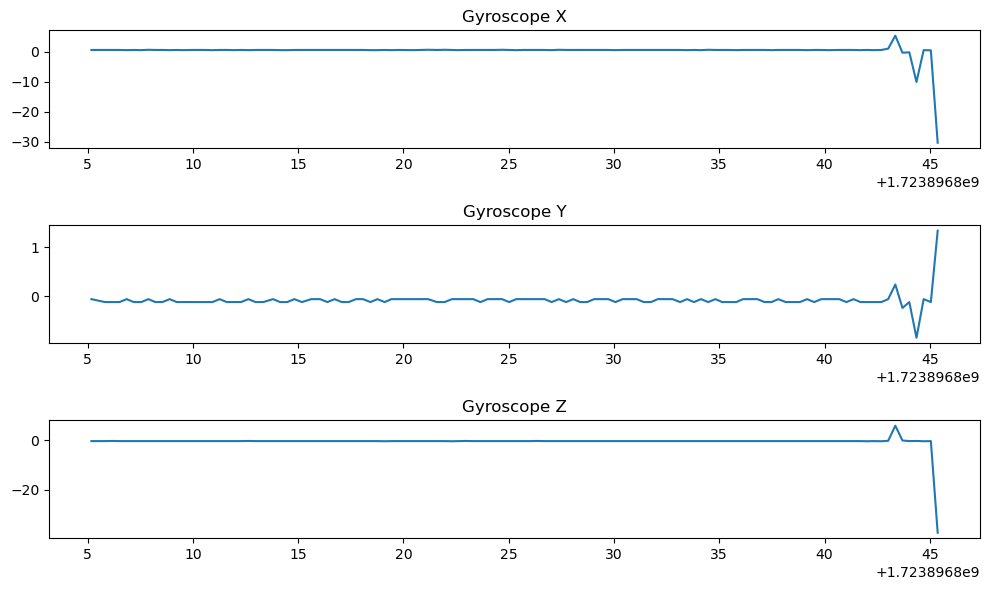

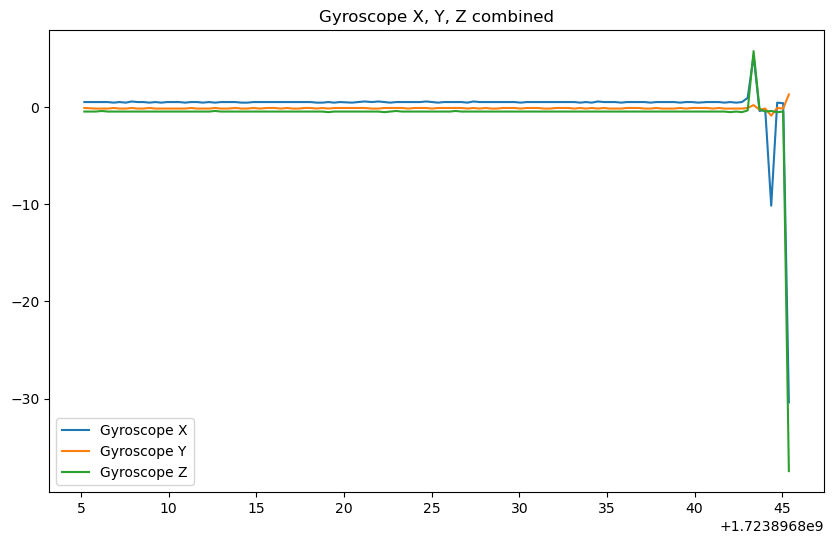

In [36]:
import matplotlib.pyplot as plt

# Load cleaned CSV data
df = pd.read_csv('cleaned_gyroscope_data.csv')

# Plot X, Y, Z separately
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['gyroX'])
plt.title('Gyroscope X')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['gyroY'])
plt.title('Gyroscope Y')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['gyroZ'])
plt.title('Gyroscope Z')

plt.tight_layout()
plt.show()

# Plot all in one graph
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['gyroX'], label='Gyroscope X')
plt.plot(df['timestamp'], df['gyroY'], label='Gyroscope Y')
plt.plot(df['timestamp'], df['gyroZ'], label='Gyroscope Z')
plt.legend()
plt.title('Gyroscope X, Y, Z combined')
plt.show()
